# Softmax
Converts scores into probability

$$ S(y_i) = \frac{e^y_i}{\sum_{j=1}^{n} e^y_j} $$

Math [markdown ref](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

In [20]:
"""Softmax."""

import numpy as np

def softmax(x): 
    return np.exp(x)/np.sum(np.exp(x), axis=0)
    
test_scores = np.array([3.0, 1.0, 0.2])
sofmax_prob = softmax(test_scores)
print('sofmax probablities of test scores {} = {}'.format(str(test_scores), str(sofmax_prob)))

sofmax probablities of test scores [3.  1.  0.2] = [0.8360188  0.11314284 0.05083836]


### Effect of constant on softmax
What happens when you multiply or divide the scores by 10

In [31]:
print('sofmax probabilities when 10x = {}'.format(softmax(test_scores * 10)))
print('sofmax probabilities when /10 = {}'.format(softmax(test_scores / 10)))

sofmax probabilities when 10x = [9.99999998e-01 2.06115362e-09 6.91440009e-13]
sofmax probabilities when /10 = [0.38842275 0.31801365 0.2935636 ]


> The probabilities either get closer to 0 or 1 when multiplied by 10

> Since all the scores decrease in magnitude when divided by 10, the softmax probabilities will be closer to each other hence they tend towards uniform

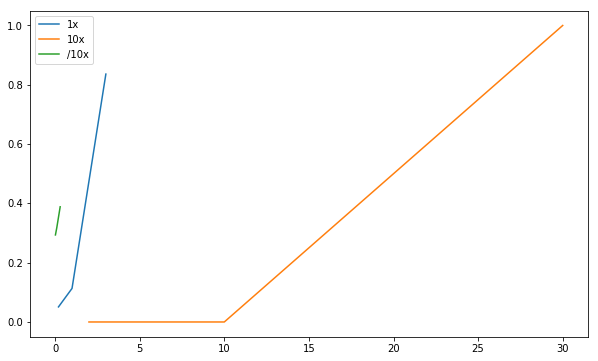

In [33]:
plt.figure(figsize=(10,6))
plt.subplot(1, 1, 1)
plt.plot(test_scores, softmax(test_scores), label='1x')
plt.plot(test_scores * 10, softmax(test_scores * 10), label='10x')
plt.plot(test_scores / 10, softmax(test_scores / 10), label='/10x')
plt.legend()
plt.show()

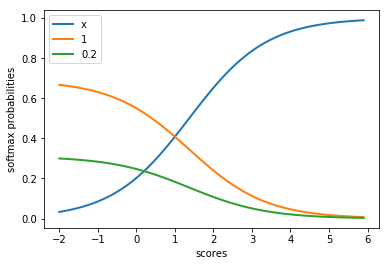

In [13]:
# Plot Sofmax curves
import matplotlib.pyplot as plt

x = np.arange(-2.0, 6.0, 0.1)
# print(x)

# generate scores and stack them sequence vertically (row wise)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])
# print(scores)
sofmax_prob = softmax(scores)

plt.figure()
plt.plot(x, sofmax_prob.T, linewidth=2)
plt.xlabel('scores')
plt.ylabel('softmax probabilities')
plt.legend(labels=('x', '1', '0.2'))
plt.show()


> Higher the score, higher the probability. 

> The 1s matrix start off highest but as the x range increases from -2 to 6, it becomes the most probable outcome

# One hot encoding and Cross Entropy

One hot encoding maps the softmax output probabilites into one of the possible labels 

$$[0.7, 0.2, 0.1] \to [1, 0, 0] $$

We can measure how well we are doing by comparing 2 vectors, the output of your classifier (probabilities) and the one hot encoded output (labels)

Distance between the two vectors is called the cross entropy, i.e the measure of distance

$$ D(S, L) = -{\sum_i} {L_i} log({S_i}) $$ i.e to get the **distance** between the vectors, multiply the output label with log of the probabilities pairwise then sum across

Any ouput label with the value 0 will render the product of (label * log(probability)) to zero, hence only the log(probability) of output labels with 1 are summed up.

We want to have a lower distance for the correct class and high distance for the incorrect class. 

`log` has the property that smaller values grow exponentially, therefore any small differences are amplified and large differences muted.


_NOTE_ Cross Entropy is not symmetric $D(S, L) \neg D(L, S) $

# Minimizing Cross-entropy

We want to minimize the distance $$D(S(wx + b), L)$$

where __w = wights matrix and b = bias vector__

We want distance between expected and actual, $D(A, a)$ to be low if correct and $D(A, b)$ to be high if incorrect

We can measure the distance averaged over the entire training set $$L = \frac{1}{N}\sum_{i=1}^n D(S(wx_i + b), L_i)$$

__This is the Training Loss = Average Cross-Entropy__

If the individual distances for each row in the training set is small, the over all distance will also be small. The loss is the function of weights and biases. To minimize this loss we need to find the combination of weights that will result in the smallest distance. This becomes a numerical optimization problem and can be solved using many numeric techniques, one of the most popular and simplest ones being __Gradient Descent__

Take the derivate of your loss w.r.t your parameters and take a step backwards, repeat until you get to the bottom of your loss distribution $$ -\alpha\nabla L(w_1, w_2....w_n)$$ where $\alpha$ is the gradient descent or learning rate